# 판다스(Pandas) 10분만에 익히기

[포스팅](https://laboputer.github.io/machine-learning/2020/04/07/padnas-10minutes/) 글에 대한 코드입니다.

In [0]:
# pandas와 numpy을 같이 import 합니다.
import pandas as pd
import numpy as np

# 시각화 관련 패키지
import matplotlib.pyplot as plt
%matplotlib inline

## 1.오브젝트 생성(Object Creation)

In [0]:
s = pd.Series([1,3,5,np.nan,6,8])

In [0]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [0]:
dates = pd.date_range('20130101', periods=6)

In [0]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [0]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

In [0]:
df

,A,B,C,D
2013-01-01,0.348675,-1.351156,-0.179984,-0.617362
2013-01-02,0.579445,0.475895,-0.024667,1.251334
2013-01-03,-1.507713,0.122660,-1.567757,-0.383044
2013-01-04,-0.901181,0.360202,1.150197,-0.297922
2013-01-05,-0.973303,1.362589,-0.776119,0.644323
2013-01-06,0.651227,0.753971,-1.692941,1.952529


In [0]:
df2 = pd.DataFrame({'A':1.,
                   'B':pd.Timestamp('20130102'),
                   'C':pd.Series(1,index=list(range(4)),dtype='float32'),
                   'D':np.array([3]*4,dtype='int32'),
                   'E':pd.Categorical(["test","train","test","train"]),
                   'F':'foo'})

In [0]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [0]:
df2.A

0    1.0
1    1.0
2    1.0
3    1.0
Name: A, dtype: float64

In [0]:
# df2.<TAB>

## 2.데이터 확인(Viewing Data)

In [0]:
df.head()

,A,B,C,D
2013-01-01,0.348675,-1.351156,-0.179984,-0.617362
2013-01-02,0.579445,0.475895,-0.024667,1.251334
2013-01-03,-1.507713,0.122660,-1.567757,-0.383044
2013-01-04,-0.901181,0.360202,1.150197,-0.297922
2013-01-05,-0.973303,1.362589,-0.776119,0.644323


In [0]:
df.tail(3)

,A,B,C,D
2013-01-04,-0.093062,0.100206,0.890981,1.078229
2013-01-05,-0.098203,-2.113593,-0.457045,0.789558
2013-01-06,-0.585436,-0.533013,0.558793,-1.323578


In [0]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [0]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [0]:
df.values

array([[ 0.34867481, -1.35115579, -0.17998376, -0.61736245],
       [ 0.57944517,  0.47589539, -0.02466693,  1.25133379],
       [-1.50771281,  0.12265966, -1.56775663, -0.3830442 ],
       [-0.90118096,  0.36020193,  1.15019657, -0.29792194],
       [-0.97330279,  1.36258901, -0.77611896,  0.64432274],
       [ 0.65122666,  0.75397091, -1.69294079,  1.95252915]])

In [0]:
df.to_numpy()

array([[ 0.34867481, -1.35115579, -0.17998376, -0.61736245],
       [ 0.57944517,  0.47589539, -0.02466693,  1.25133379],
       [-1.50771281,  0.12265966, -1.56775663, -0.3830442 ],
       [-0.90118096,  0.36020193,  1.15019657, -0.29792194],
       [-0.97330279,  1.36258901, -0.77611896,  0.64432274],
       [ 0.65122666,  0.75397091, -1.69294079,  1.95252915]])

In [0]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.277088,0.016363,-0.027911,0.097192
std,0.564282,1.583032,0.734287,1.214697
min,-1.160801,-2.113593,-1.126817,-1.323578
25%,-0.502563,-0.846668,-0.406982,-0.798252
50%,-0.176074,-0.216403,-0.016688,0.003856
75%,-0.094348,1.037882,0.474949,1.006061
max,0.528919,2.245356,0.890981,1.624509


In [0]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-1.160801,0.528919,-0.253946,-0.093062,-0.098203,-0.585436
B,1.350440,2.245356,-0.951220,0.100206,-2.113593,-0.533013
C,-1.126817,-0.256795,0.223419,0.890981,-0.457045,0.558793
D,1.624509,-0.803721,-0.781845,1.078229,0.789558,-1.323578


In [0]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,1.624509,-1.126817,1.350440,-1.160801
2013-01-02,-0.803721,-0.256795,2.245356,0.528919
2013-01-03,-0.781845,0.223419,-0.951220,-0.253946
2013-01-04,1.078229,0.890981,0.100206,-0.093062
2013-01-05,0.789558,-0.457045,-2.113593,-0.098203
2013-01-06,-1.323578,0.558793,-0.533013,-0.585436


In [0]:
df.sort_values(by='B')

,A,B,C,D
2013-01-05,-0.098203,-2.113593,-0.457045,0.789558
2013-01-03,-0.253946,-0.951220,0.223419,-0.781845
2013-01-06,-0.585436,-0.533013,0.558793,-1.323578
2013-01-04,-0.093062,0.100206,0.890981,1.078229
2013-01-01,-1.160801,1.350440,-1.126817,1.624509
2013-01-02,0.528919,2.245356,-0.256795,-0.803721


## 3.데이터 선택하기 (Selection)

### 3-1. 데이터 가져오기(Getting)

In [0]:
df['A']

2013-01-01   -1.160801
2013-01-02    0.528919
2013-01-03   -0.253946
2013-01-04   -0.093062
2013-01-05   -0.098203
2013-01-06   -0.585436
Freq: D, Name: A, dtype: float64

In [0]:
df[0:3]

,A,B,C,D
2013-01-01,-1.160801,1.350440,-1.126817,1.624509
2013-01-02,0.528919,2.245356,-0.256795,-0.803721
2013-01-03,-0.253946,-0.951220,0.223419,-0.781845


In [0]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,0.528919,2.245356,-0.256795,-0.803721
2013-01-03,-0.253946,-0.951220,0.223419,-0.781845
2013-01-04,-0.093062,0.100206,0.890981,1.078229


### 3-2. 이름으로 데이터 가져오기(Selection by Label)

In [0]:
dates[0]

Timestamp('2013-01-01 00:00:00', freq='D')

In [0]:
df.loc[dates[0]]

A   -1.160801
B    1.350440
C   -1.126817
D    1.624509
Name: 2013-01-01 00:00:00, dtype: float64

In [0]:
df.loc[:,['A','B']]

,A,B
2013-01-01,-1.160801,1.350440
2013-01-02,0.528919,2.245356
2013-01-03,-0.253946,-0.951220
2013-01-04,-0.093062,0.100206
2013-01-05,-0.098203,-2.113593
2013-01-06,-0.585436,-0.533013


In [0]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,0.528919,2.245356
2013-01-03,-0.253946,-0.951220
2013-01-04,-0.093062,0.100206


In [0]:
df.loc['20130102',['A','B']]

A    0.528919
B    2.245356
Name: 2013-01-02 00:00:00, dtype: float64

In [0]:
df.loc[dates[0],'A']

-1.1608006779948392

### 3-3. 인덱스로 데이터 가져오기(Selection by Position)

In [0]:
df.iloc[3]

A   -0.093062
B    0.100206
C    0.890981
D    1.078229
Name: 2013-01-04 00:00:00, dtype: float64

In [0]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,-0.093062,0.100206
2013-01-05,-0.098203,-2.113593


In [0]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,0.528919,-0.256795
2013-01-03,-0.253946,0.223419
2013-01-05,-0.098203,-0.457045


In [0]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,0.528919,2.245356,-0.256795,-0.803721
2013-01-03,-0.253946,-0.951220,0.223419,-0.781845


In [0]:
df.iloc[:,1:3]

,B,C
2013-01-01,1.350440,-1.126817
2013-01-02,2.245356,-0.256795
2013-01-03,-0.951220,0.223419
2013-01-04,0.100206,0.890981
2013-01-05,-2.113593,-0.457045
2013-01-06,-0.533013,0.558793


In [0]:
df.iloc[1,1]

2.245356032435778

In [0]:
df.iat[1,1]

2.245356032435778

### 3-4. 조건으로 가져오기(Boolean Indexing)

In [0]:
df[df['A'] > 0]

,A,B,C,D
2013-01-01,0.348675,-1.351156,-0.179984,-0.617362
2013-01-02,0.579445,0.475895,-0.024667,1.251334
2013-01-06,0.651227,0.753971,-1.692941,1.952529


In [0]:
df[df > 0]

,A,B,C,D
2013-01-01,0.348675,NaN,NaN,NaN
2013-01-02,0.579445,0.475895,NaN,1.251334
2013-01-03,NaN,0.122660,NaN,NaN
2013-01-04,NaN,0.360202,1.150197,NaN
2013-01-05,NaN,1.362589,NaN,0.644323
2013-01-06,0.651227,0.753971,NaN,1.952529


In [0]:
df2 = df.copy()

In [0]:
df2['E'] = ['one','one', 'two','three','four','three']

In [0]:
df2

,A,B,C,D,E
2013-01-01,-1.160801,1.350440,-1.126817,1.624509,one
2013-01-02,0.528919,2.245356,-0.256795,-0.803721,one
2013-01-03,-0.253946,-0.951220,0.223419,-0.781845,two
2013-01-04,-0.093062,0.100206,0.890981,1.078229,three
2013-01-05,-0.098203,-2.113593,-0.457045,0.789558,four
2013-01-06,-0.585436,-0.533013,0.558793,-1.323578,three


In [0]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,-0.253946,-0.951220,0.223419,-0.781845,two
2013-01-05,-0.098203,-2.113593,-0.457045,0.789558,four


### 3-5. 데이터 변경하기(Setting)

In [0]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102',periods=6))

In [0]:
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [0]:
df['F'] = s1

In [0]:
df.at[dates[0],'A'] = 0

In [0]:
df.iat[0,1] = 0

In [0]:
df.loc[:,'D'] = np.array([5] * len(df))

In [0]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.126817,5,NaN
2013-01-02,0.528919,2.245356,-0.256795,5,1.0
2013-01-03,-0.253946,-0.951220,0.223419,5,2.0
2013-01-04,-0.093062,0.100206,0.890981,5,3.0
2013-01-05,-0.098203,-2.113593,-0.457045,5,4.0
2013-01-06,-0.585436,-0.533013,0.558793,5,5.0


In [0]:
df2 = df.copy()

In [0]:
df2[df2 > 0] = -df2

In [0]:
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.126817,-5,NaN
2013-01-02,-0.528919,-2.245356,-0.256795,-5,-1.0
2013-01-03,-0.253946,-0.951220,-0.223419,-5,-2.0
2013-01-04,-0.093062,-0.100206,-0.890981,-5,-3.0
2013-01-05,-0.098203,-2.113593,-0.457045,-5,-4.0
2013-01-06,-0.585436,-0.533013,-0.558793,-5,-5.0


## 4.결측 데이터(Missing Data)

In [0]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])

In [0]:
df1.loc[dates[0]:dates[1],'E'] = 1

In [0]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-1.126817,5,NaN,1.0
2013-01-02,0.528919,2.245356,-0.256795,5,1.0,1.0
2013-01-03,-0.253946,-0.951220,0.223419,5,2.0,NaN
2013-01-04,-0.093062,0.100206,0.890981,5,3.0,NaN


In [0]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,0.528919,2.245356,-0.256795,5,1.0,1.0


In [0]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-1.126817,5,5.0,1.0
2013-01-02,0.528919,2.245356,-0.256795,5,1.0,1.0
2013-01-03,-0.253946,-0.951220,0.223419,5,2.0,5.0
2013-01-04,-0.093062,0.100206,0.890981,5,3.0,5.0


In [0]:
pd.isnull(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## 5.연산하기(Operations)

### 5-1. 통계지표(Stats)

In [0]:
df.mean()

A   -0.083621
B   -0.208711
C   -0.027911
D    5.000000
F    3.000000
dtype: float64

In [0]:
df.mean(1)

2013-01-01    0.968296
2013-01-02    1.703496
2013-01-03    1.203651
2013-01-04    1.779625
2013-01-05    1.266232
2013-01-06    1.888069
Freq: D, dtype: float64

In [0]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)

In [0]:
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [0]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-1.253946,-1.951220,-0.776581,4.0,1.0
2013-01-04,-3.093062,-2.899794,-2.109019,2.0,0.0
2013-01-05,-5.098203,-7.113593,-5.457045,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


### 5-2. 함수 적용(Apply)

In [0]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.126817,5,NaN
2013-01-02,0.528919,2.245356,-1.383612,10,1.0
2013-01-03,0.274973,1.294136,-1.160193,15,3.0
2013-01-04,0.181910,1.394342,-0.269212,20,6.0
2013-01-05,0.083707,-0.719251,-0.726257,25,10.0
2013-01-06,-0.501728,-1.252264,-0.167465,30,15.0


In [0]:
df.apply(lambda x: x.max() - x.min())

A    1.114354
B    4.358949
C    2.017798
D    0.000000
F    4.000000
dtype: float64

### 5-3. 히스토그램(Histogramming)

In [0]:
s = pd.Series(np.random.randint(0, 7, size=10))

In [0]:
s

0    5
1    3
2    2
3    3
4    0
5    4
6    3
7    4
8    3
9    2
dtype: int32

In [0]:
s.value_counts()

3    4
4    2
2    2
5    1
0    1
dtype: int64

### 5-4. 문자열 관련 처리(String Methods)

In [0]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

In [0]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## 6.데이터 합치기(Merge)

### 6-1. 이어붙이기(Concat)

In [0]:
df = pd.DataFrame(np.random.randn(10, 4))

In [0]:
df

,0,1,2,3
0,1.590092,0.564066,0.521476,0.628626
1,-0.675627,0.061639,-1.419665,-1.683719
2,-1.192757,-0.346602,2.246563,0.432095
3,0.777386,-1.272256,-0.512404,0.086339
4,0.006978,0.058503,-1.481919,0.138789
5,-1.505119,-0.665700,-1.032970,0.504922
6,-0.209184,-1.718691,-0.282240,-0.151445
7,0.450164,0.177133,-0.444645,1.146489
8,-0.689884,0.748130,0.608955,-0.664917
9,1.122287,-0.345145,0.083216,1.772749


In [0]:
pieces = [df[:3], df[3:7], df[7:]]

NameError: name 'df' is not defined

In [0]:
pd.concat(pieces)

,0,1,2,3
0,1.590092,0.564066,0.521476,0.628626
1,-0.675627,0.061639,-1.419665,-1.683719
2,-1.192757,-0.346602,2.246563,0.432095
3,0.777386,-1.272256,-0.512404,0.086339
4,0.006978,0.058503,-1.481919,0.138789
5,-1.505119,-0.665700,-1.032970,0.504922
6,-0.209184,-1.718691,-0.282240,-0.151445
7,0.450164,0.177133,-0.444645,1.146489
8,-0.689884,0.748130,0.608955,-0.664917
9,1.122287,-0.345145,0.083216,1.772749


### 6-2. 조인(Join)

In [0]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})

In [0]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [0]:
left

,key,lval
0,foo,1
1,foo,2


In [0]:
right

,key,rval
0,foo,4
1,foo,5


In [0]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [0]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})

In [0]:
left

,key,lval
0,foo,1
1,bar,2


In [0]:
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

In [0]:
right

,key,rval
0,foo,4
1,bar,5


In [0]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


## 7.그룹화(Grouping)

In [0]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
                                    'B' : ['one', 'one', 'two', 'three','two', 'two', 'one', 'three'],
                                    'C' : np.random.randn(8),
                                     'D' : np.random.randn(8)})

In [0]:
df

,A,B,C,D
0,foo,one,0.234679,-0.742428
1,bar,one,0.794077,-0.444526
2,foo,two,-1.103167,1.191702
3,bar,three,-0.385300,-0.530512
4,foo,two,0.476553,1.637311
5,bar,two,1.394824,0.391403
6,foo,one,0.677522,-0.441027
7,foo,three,0.461757,0.321676


Grouping and then applying a function sum to the resulting groups.

In [0]:
df.groupby('A').sum()

,C,D
A,,
bar,1.803601,-0.583636
foo,0.747345,1.967233


In [0]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    0.794077 -0.444526
    three -0.385300 -0.530512
    two    1.394824  0.391403
foo one    0.912201 -1.183455
    three  0.461757  0.321676
    two   -0.626613  2.829013

## 8.데이터 구조 변경하기 (Reshaping)

### 8-1. 스택(Stack)

In [0]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
                                ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]))

In [0]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

In [0]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

In [0]:
df2 = df[:4]

In [0]:
df2

A         B
first second                    
bar   one    -0.550713 -2.632594
      two     1.114643 -1.231132
baz   one     2.022526 -0.852112
      two     1.194659  0.729303

In [0]:
stacked = df2.stack()

In [0]:
stacked

first  second   
bar    one     A   -0.550713
               B   -2.632594
       two     A    1.114643
               B   -1.231132
baz    one     A    2.022526
               B   -0.852112
       two     A    1.194659
               B    0.729303
dtype: float64

In [0]:
stacked.unstack()

A         B
first second                    
bar   one    -0.550713 -2.632594
      two     1.114643 -1.231132
baz   one     2.022526 -0.852112
      two     1.194659  0.729303

In [0]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.550713  1.114643
      B -2.632594 -1.231132
baz   A  2.022526  1.194659
      B -0.852112  0.729303

In [0]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.550713  2.022526
       B -2.632594 -0.852112
two    A  1.114643  1.194659
       B -1.231132  0.729303

### 8-2. 피벗 테이블(Pivot Tables)

In [0]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                                    'B' : ['A', 'B', 'C'] * 4,
                                    'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                                    'D' : np.random.randn(12),
                                    'E' : np.random.randn(12)})

In [0]:
df

,A,B,C,D,E
0,one,A,foo,1.841912,-1.254732
1,one,B,foo,-0.205527,0.927007
2,two,C,foo,-0.519763,0.900022
3,three,A,bar,-0.240530,-0.124600
4,one,B,bar,-0.090635,-1.355138
5,one,C,bar,0.918863,-1.493705
6,two,A,foo,1.225386,1.518278
7,three,B,foo,-1.902415,-1.774154
8,one,C,foo,0.028049,-1.728172
9,one,A,bar,1.617027,0.273678


In [0]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  1.617027  1.841912
      B -0.090635 -0.205527
      C  0.918863  0.028049
three A -0.240530       NaN
      B       NaN -1.902415
      C  0.618831       NaN
two   A       NaN  1.225386
      B -0.839234       NaN
      C       NaN -0.519763

## 9.시계열 데이터(Time Series)

In [0]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')

In [0]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [0]:
ts.resample('5Min').sum()

2012-01-01    23289
Freq: 5T, dtype: int32

In [0]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')

In [0]:
ts = pd.Series(np.random.randn(len(rng)), rng)

In [0]:
ts

2012-03-06    1.308232
2012-03-07    0.936681
2012-03-08    0.013171
2012-03-09    0.042598
2012-03-10    0.877987
Freq: D, dtype: float64

In [0]:
ts_utc = ts.tz_localize('UTC')

In [0]:
ts_utc

2012-03-06 00:00:00+00:00    1.308232
2012-03-07 00:00:00+00:00    0.936681
2012-03-08 00:00:00+00:00    0.013171
2012-03-09 00:00:00+00:00    0.042598
2012-03-10 00:00:00+00:00    0.877987
Freq: D, dtype: float64

In [0]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    1.308232
2012-03-06 19:00:00-05:00    0.936681
2012-03-07 19:00:00-05:00    0.013171
2012-03-08 19:00:00-05:00    0.042598
2012-03-09 19:00:00-05:00    0.877987
Freq: D, dtype: float64

In [0]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')

In [0]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [0]:
ts

2012-01-31   -0.626247
2012-02-29    2.235490
2012-03-31   -1.687312
2012-04-30    1.262021
2012-05-31   -0.002631
Freq: M, dtype: float64

In [0]:
ps = ts.to_period()

In [0]:
ps

2012-01   -0.626247
2012-02    2.235490
2012-03   -1.687312
2012-04    1.262021
2012-05   -0.002631
Freq: M, dtype: float64

In [0]:
ps.to_timestamp()

2012-01-01   -0.626247
2012-02-01    2.235490
2012-03-01   -1.687312
2012-04-01    1.262021
2012-05-01   -0.002631
Freq: MS, dtype: float64

In [0]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')

In [0]:
ts = pd.Series(np.random.randn(len(prng)), prng)

In [0]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9

In [0]:
ts.head()

1990-03-01 09:00    0.518888
1990-06-01 09:00   -1.919605
1990-09-01 09:00   -0.489806
1990-12-01 09:00    0.352551
1991-03-01 09:00   -0.355452
Freq: H, dtype: float64

## 10.범주형 데이터(Categoricals)

In [0]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})

In [0]:
df["grade"] = df["raw_grade"].astype("category")

In [0]:
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [0]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

In [0]:
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


In [0]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])

In [0]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

In [0]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [0]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## 11.그래프 시각화(Plotting)

In [0]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

In [0]:
ts

2000-01-01   -0.760622
2000-01-02   -0.401781
2000-01-03    1.072127
2000-01-04    0.590405
2000-01-05   -0.262732
                ...   
2002-09-22    1.900158
2002-09-23    2.588743
2002-09-24    0.466563
2002-09-25   -0.775347
2002-09-26    0.483113
Freq: D, Length: 1000, dtype: float64

In [0]:
ts = ts.cumsum()

In [0]:
ts

2000-01-01   -0.760622
2000-01-02   -1.162403
2000-01-03   -0.090276
2000-01-04    0.500129
2000-01-05    0.237397
                ...   
2002-09-22    3.481143
2002-09-23    6.069887
2002-09-24    6.536450
2002-09-25    5.761102
2002-09-26    6.244215
Freq: D, Length: 1000, dtype: float64

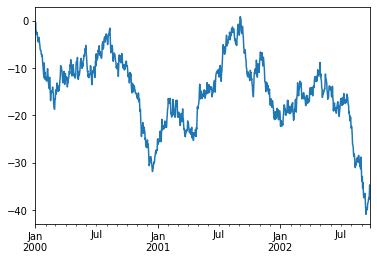

In [0]:
ts.plot()

In [0]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])

In [0]:
df = df.cumsum()

<Figure size 432x288 with 0 Axes>

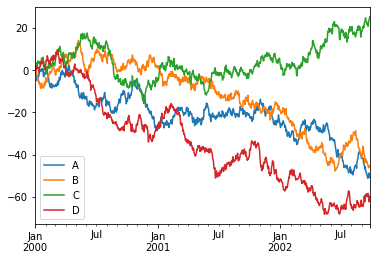

In [0]:
plt.figure()
df.plot()
plt.legend(loc='best')

## 12.파일 입출력(Getting Data In/Out)

### 12-1. CSV

In [0]:
df.to_csv('foo.csv')

In [0]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.196030,-0.159549,-1.110689,-0.043820
1,2000-01-02,0.804142,-1.825197,-1.041056,1.157358
2,2000-01-03,-0.927607,-2.698263,-0.554641,0.644156
3,2000-01-04,-0.504833,-1.787893,-0.499680,1.257813
4,2000-01-05,-1.117570,-1.162072,-1.229462,1.547675
...,...,...,...,...,...
995,2002-09-22,83.381870,-26.304967,-23.922886,-17.836663
996,2002-09-23,83.593856,-26.037092,-23.621604,-17.229214
997,2002-09-24,84.450600,-26.228553,-22.055964,-17.320377
998,2002-09-25,84.606621,-26.459262,-21.544691,-17.587936


### 12-2. HDF5

In [0]:
df.to_hdf('foo.h5','df')

ImportError: Missing optional dependency 'tables'.  Use pip or conda to install tables.

In [0]:
pd.read_hdf('foo.h5','df')

### 12-3 Excel

In [0]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

In [0]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])